In [66]:
import pandas as pd
import numpy   as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score, zero_one_loss
from sklearn.preprocessing import StandardScaler
sns.set_theme()
Dataset = pd.read_csv('Dry_Bean_Dataset_tratado.csv')
Dataset = Dataset.iloc[:, :-1]
Dataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


**Normalização:**

In [67]:
def Normalization(x):
        
    return x/x.abs().max()

In [68]:
X = Normalization(Dataset)

<Axes: xlabel='Area', ylabel='Compactness'>

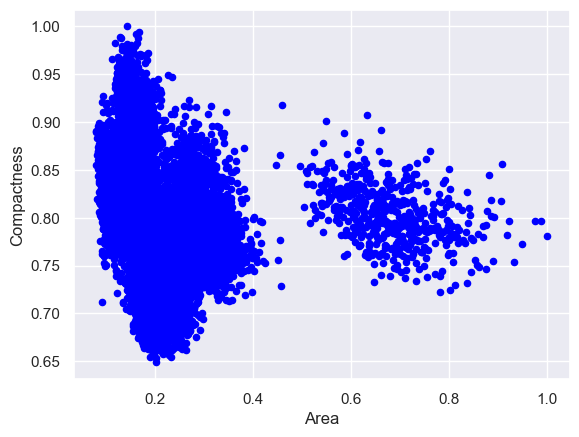

In [69]:
X.plot(x='Area', y='Compactness', kind='scatter', c='blue')

In [70]:
kmeans = KMeans(n_clusters=7, n_init='auto', init='random')
kmeans.fit(X)

KMeans(init='random', n_clusters=7)

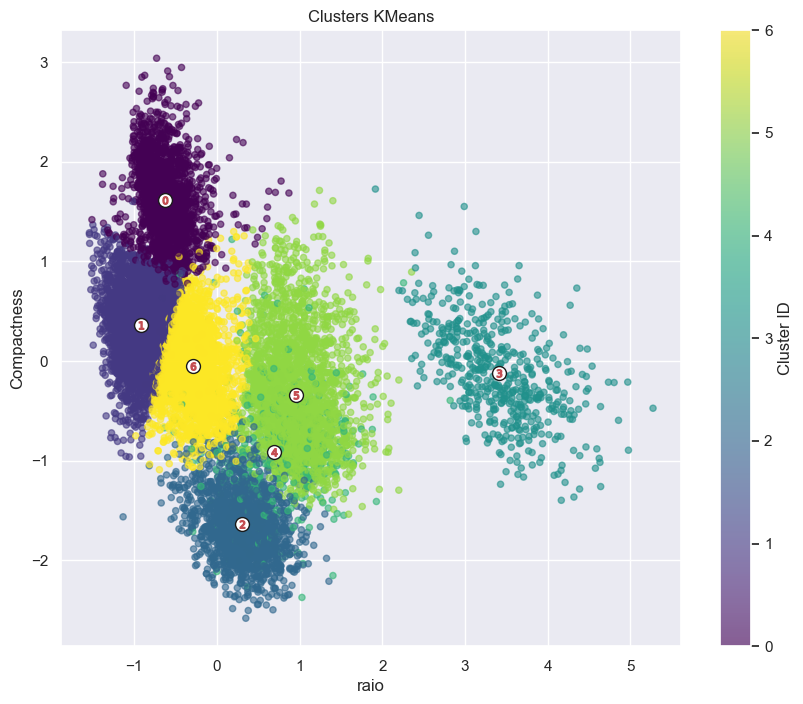

In [82]:
# dados em escala
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Treinamento do modelo KMeans
kmeans = KMeans(n_clusters=7, n_init='auto', init='random')
kmeans.fit(X)

# Selecionar duas características para visualização (raio e compacidade)
X_treino_vis = pd.DataFrame(X[:, [1, 11]], columns=['raio', 'Compactness'])

# Visualização do KMeans
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_treino_vis['raio'], X_treino_vis['Compactness'], c=kmeans.labels_, s=20, cmap='viridis', alpha=0.6)

# Plotando os centros dos clusters
centers = kmeans.cluster_centers_[:, [1, 11]]
plt.scatter(centers[:, 0], centers[:, 1], c='white', marker='o', s=100, alpha=1, edgecolor='k')

for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=30, edgecolor='r')

plt.xlabel('raio')
plt.ylabel('Compactness')
plt.title('Clusters KMeans')
plt.colorbar(scatter, label='Cluster ID')
plt.show()


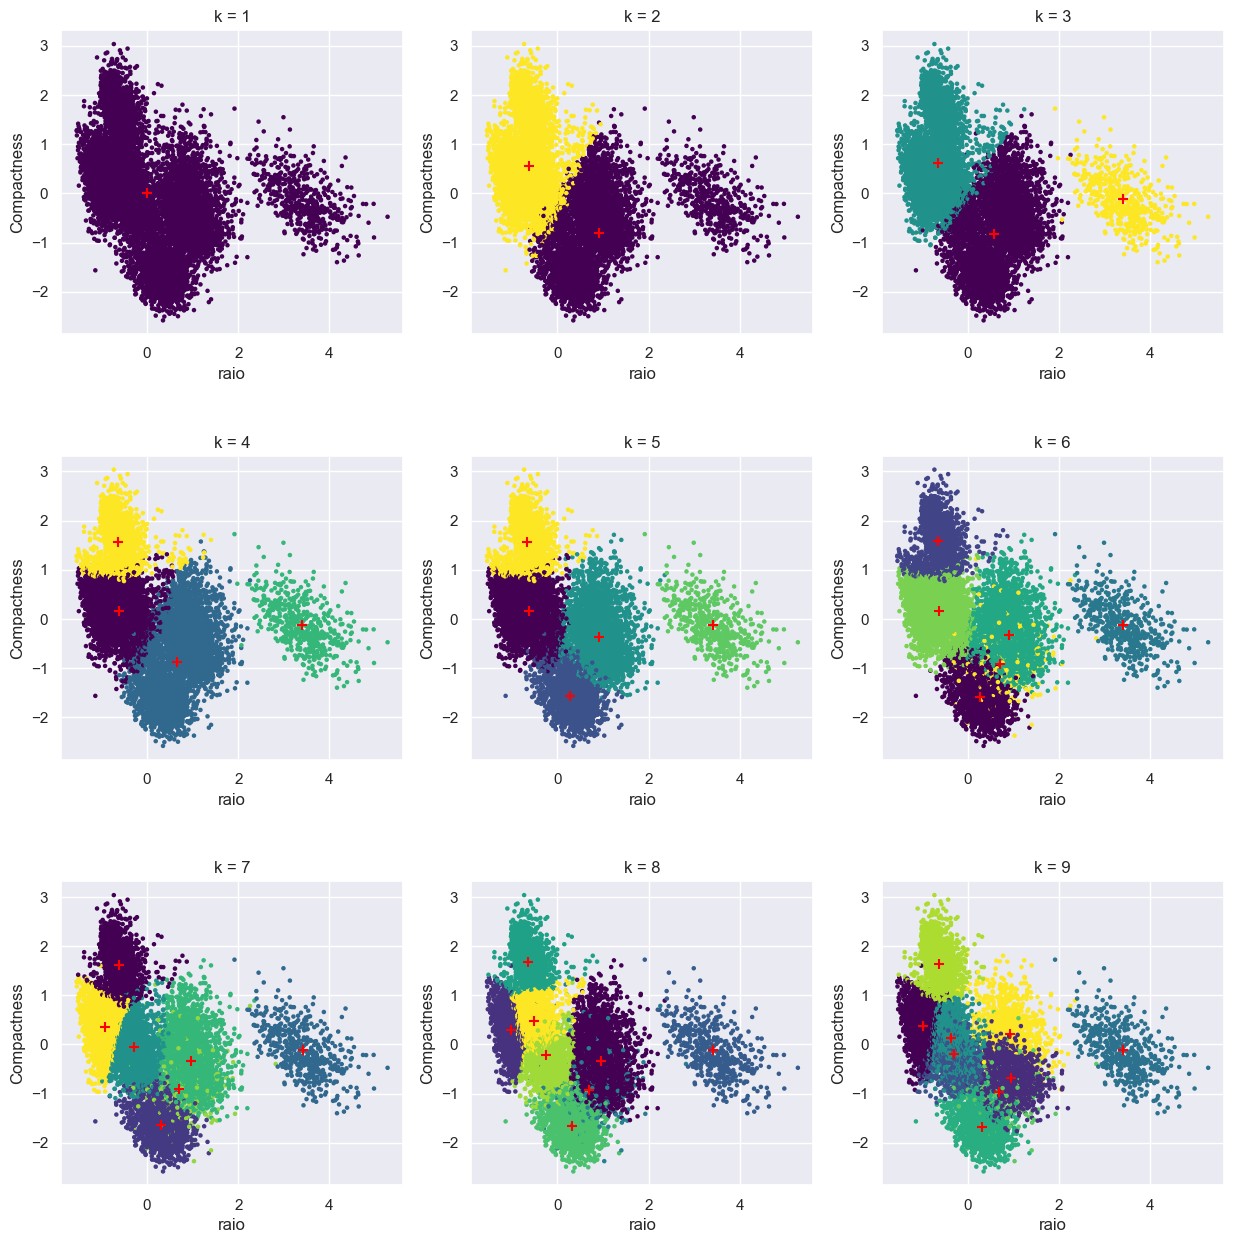

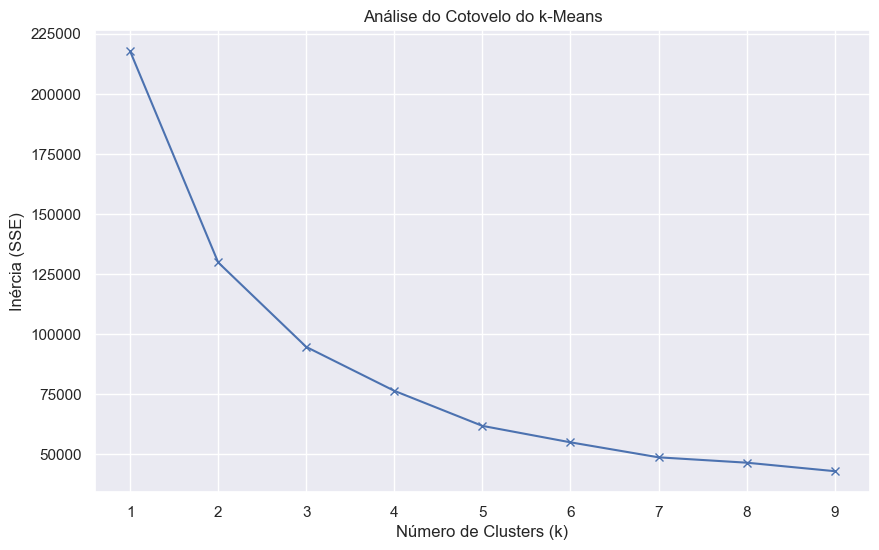

In [85]:

# Análise do Cotovelo
inertia = []
K = range(1, 10)

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

for k in K:
    model = KMeans(n_clusters=k, n_init='auto')
    model.fit(X)
    inertia.append(model.inertia_)
    
    # Selecionar duas características para visualização (raio e compacidade)
    X_treino_vis = pd.DataFrame(X[:, [1, 11]], columns=['raio', 'Compactness'])
    
    axk = axs[int((k-1)/3), ((k-1)%3)]
    axk.set_title(f'k = {k}')
    axk.set_xlabel('raio')
    axk.set_ylabel('Compactness')
    scatter = axk.scatter(X_treino_vis['raio'], X_treino_vis['Compactness'], c=model.labels_, s=5, cmap='viridis')
    
    centers = model.cluster_centers_[:, [1, 11]]  # Ajustando os centros para as características selecionadas
    axk.scatter(centers[:, 0], centers[:, 1], c='red', marker='+', s=50, alpha=1)

# Plotando a análise do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (SSE)')
plt.title('Análise do Cotovelo do k-Means')
plt.show()


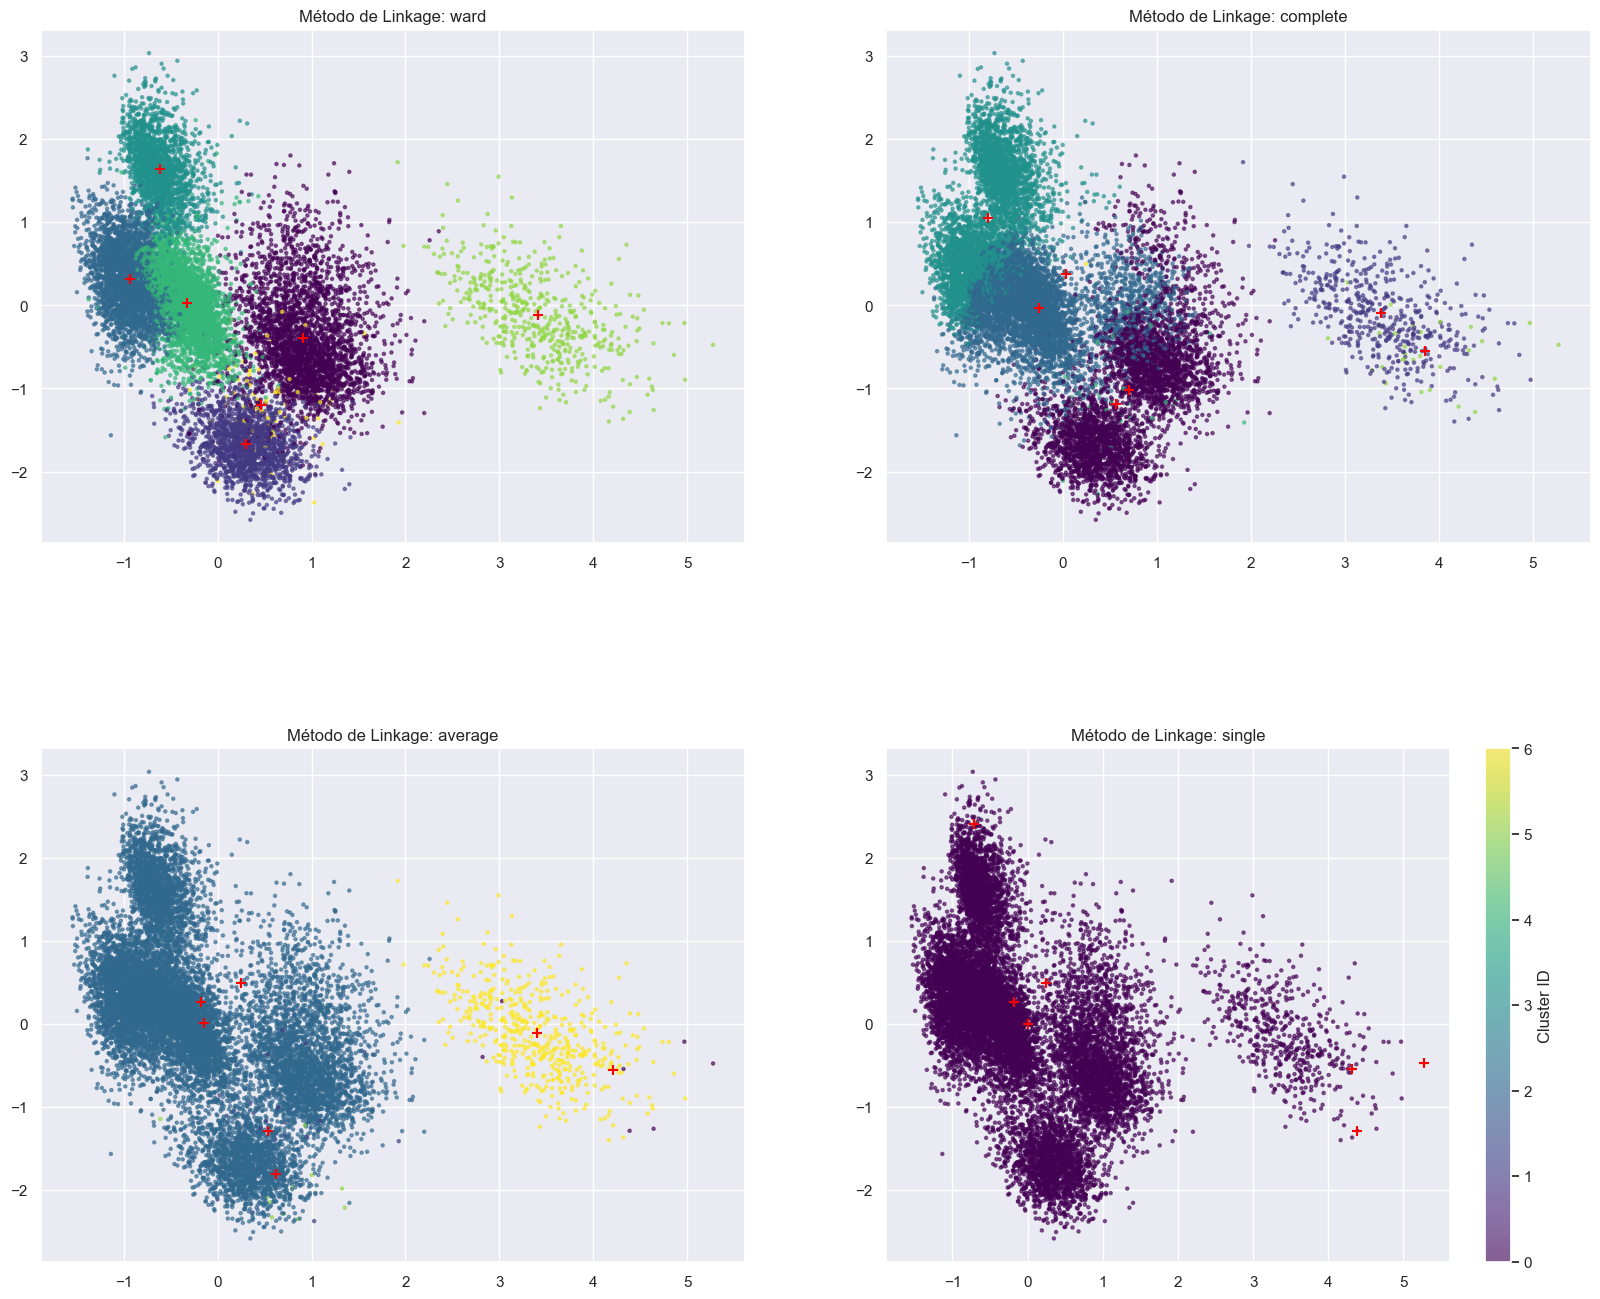

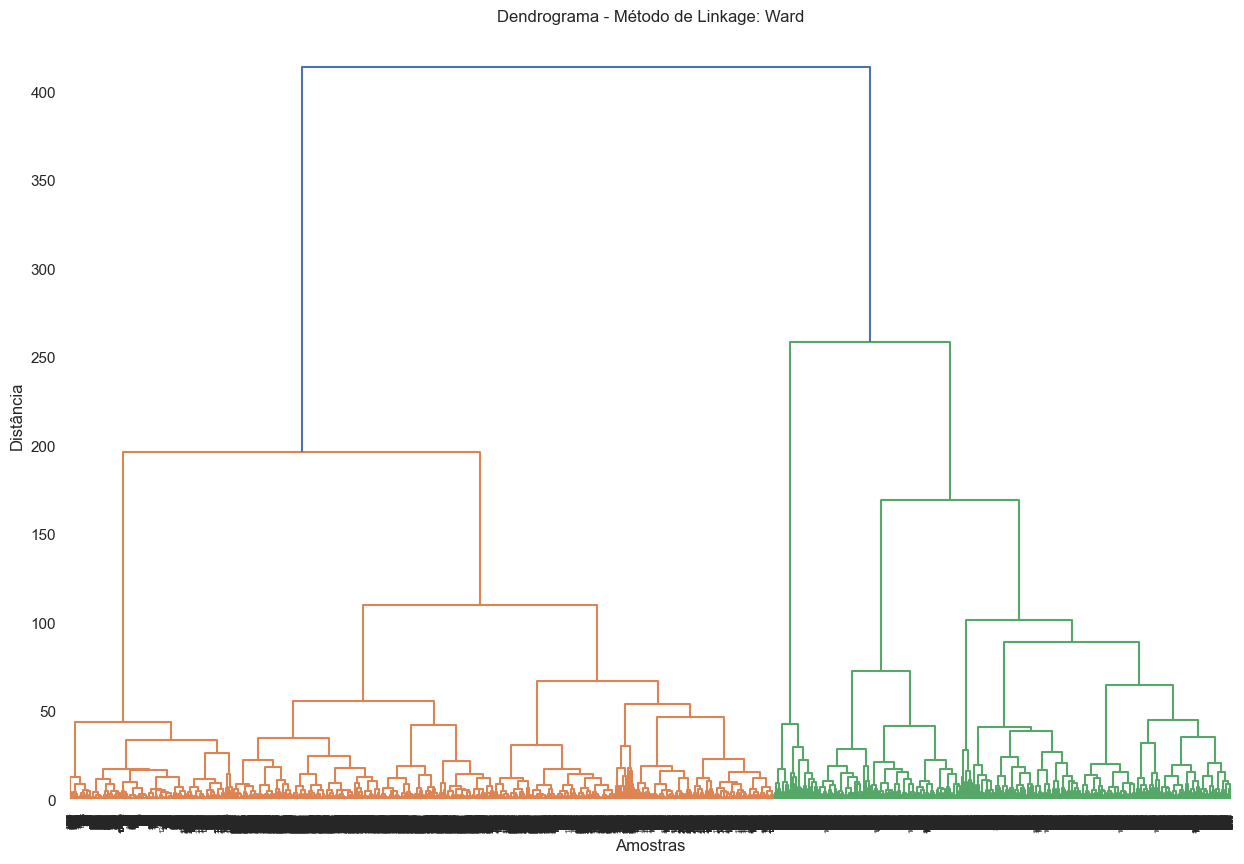

In [88]:
# modelo de agrupamento hierárquico
linkage_methods = ['ward', 'complete', 'average', 'single']
fig, axs = plt.subplots(2, 2, figsize=(20, 16))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

for i, method in enumerate(linkage_methods):
    clustering = AgglomerativeClustering(n_clusters=7, linkage=method)
    clustering.fit(X)
    
    ax = axs[int(i/2), i%2]
    ax.set_title(f'Método de Linkage: {method}')
    scatter = ax.scatter(X_treino_vis['raio'], X_treino_vis['Compactness'], c=clustering.labels_, s=5, cmap='viridis', alpha=0.6)
    
    centers = pd.DataFrame(X).groupby(clustering.labels_).mean().values[:, [1, 11]]
    ax.scatter(centers[:, 0], centers[:, 1], c='red', marker='+', s=50, alpha=1)

plt.colorbar(scatter, label='Cluster ID')
plt.show()

# dendrograma
plt.figure(figsize=(15, 10))
linkage_matrix = linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrograma - Método de Linkage: Ward')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()